In [69]:
# 2.1.1 Analiza wstępna danych (Exploratory Data Analysis – EDA)

import pandas as pd

df = pd.read_csv('ElectionData.csv')

print("Liczba wierszy i kolumn:", df.shape)
print("\nPodgląd danych:")
print(df.head())



Liczba wierszy i kolumn: (21643, 28)

Podgląd danych:
   TimeElapsed                 time        territoryName  totalMandates  \
0            0  2019-10-06 20:10:02  Território Nacional              0   
1            0  2019-10-06 20:10:02  Território Nacional              0   
2            0  2019-10-06 20:10:02  Território Nacional              0   
3            0  2019-10-06 20:10:02  Território Nacional              0   
4            0  2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0        

In [70]:
print("\nTypy danych:")
print(df.dtypes)

print("\nBrakujące dane:")
print(df.isnull().sum())



Typy danych:
TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates 

In [71]:
print("Unikalne partie:", df['Party'].unique())

print("Unikalne regiony:", df['territoryName'].nunique())


Unikalne partie: ['PS' 'PPD/PSD' 'B.E.' 'CDS-PP' 'PCP-PEV' 'PAN' 'CH' 'R.I.R.' 'PCTP/MRPP'
 'A' 'L' 'IL' 'JPP' 'NC' 'PDR' 'PNR' 'PURP' 'PPM' 'MPT' 'PTP' 'MAS']
Unikalne regiony: 21


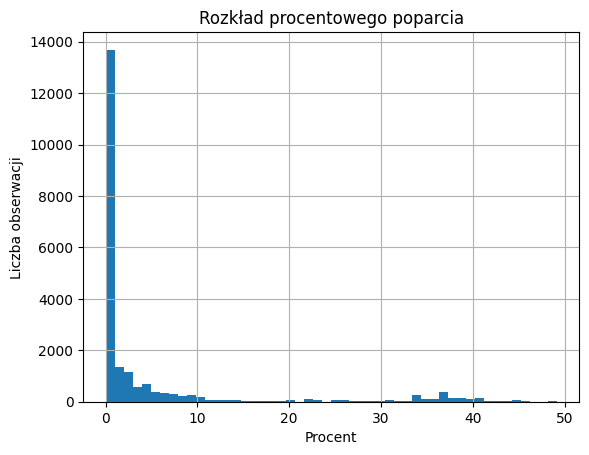

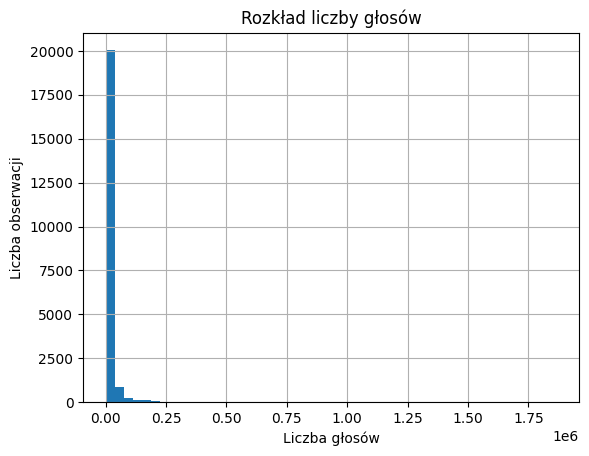

In [72]:
import matplotlib.pyplot as plt

df['Percentage'].hist(bins=50)
plt.title('Rozkład procentowego poparcia')
plt.xlabel('Procent')
plt.ylabel('Liczba obserwacji')
plt.show()

df['Votes'].hist(bins=50)
plt.title('Rozkład liczby głosów')
plt.xlabel('Liczba głosów')
plt.ylabel('Liczba obserwacji')
plt.show()


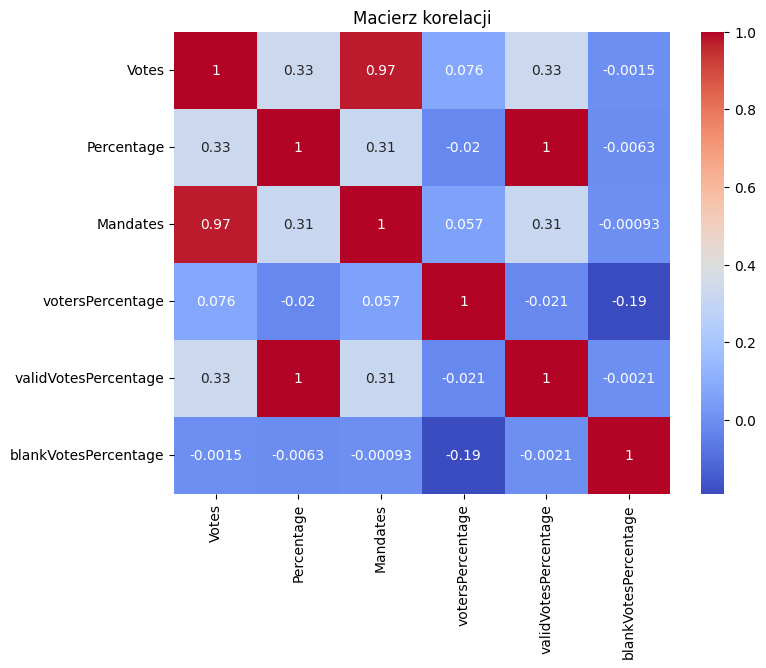

In [73]:
import seaborn as sns
import numpy as np

cols_of_interest = ['Votes', 'Percentage', 'Mandates', 'votersPercentage', 'validVotesPercentage', 'blankVotesPercentage']
correlation_matrix = df[cols_of_interest].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()


In [74]:
# 2.2.1 Wybór cechy docelowej:

target_column = 'Percentage'


In [75]:
# 2.2.2 Selekcja cech wejściowych
X = df.drop(columns=[
    'Percentage', 'time', 'territoryName',
    'Votes', 'Hondt', 'Mandates', 'FinalMandates'
])
cols_to_remove = [col for col in X.columns if col.startswith('pre.')]
X = X.drop(columns=cols_to_remove)

In [76]:
# 2.2.3 Kodowanie zmiennych kategorycznych
X = pd.get_dummies(X, columns=['Party'], drop_first=True)

In [77]:
# 2.2.4 Podział danych na zbiór treningowy i testowy

from sklearn.model_selection import train_test_split

y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# 2.2.5 Standaryzacja cech

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 3.1 Metryki oceny modeli

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# 3.2 Regresja liniowa

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

mae_lin, rmse_lin, r2_lin = evaluate_model(y_test, y_pred_lin)
print("Regresja liniowa:")
print(f"MAE: {mae_lin:.2f}, RMSE: {rmse_lin:.2f}, R²: {r2_lin:.2f}")
